## Startup in my environment
```
cd /local/teach/cl23/Fst
source /local/sys/python/cl23/bin/activate
jupyter lab hfst-howto.ipynb
```

## Introduction
This notebook builds a two-coin model with HFST operations. For the original epik version,
see 

In [1]:
import hfst_dev as hfst
import graphviz

## Booleans and states
This builds a two-coin model with HFST operations.

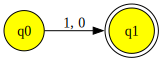

In [2]:
Bool = hfst.regex('["0"|"1"]')
Bool.view()

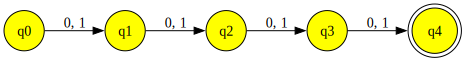

In [3]:
# Unrestricted state
# define St0 [Bool Bool Bool Bool];
defs = {"Bool":Bool}
St0 = hfst.regex('[Bool Bool Bool Bool]',definitions=defs)
St0.view()

In [4]:
# Coin 1 is heads etc
H1 = hfst.regex('[1 Bool Bool Bool]',definitions=defs);
T1 = hfst.regex('[Bool 1 Bool Bool]',definitions=defs);
H2 = hfst.regex('[Bool Bool 1 Bool]',definitions=defs);
T2 = hfst.regex('[Bool Bool Bool 1]',definitions=defs);

Definitions that allow terms such as Bool and H1 to be used Fst regexes.

In [5]:
defs = {"Bool":Bool,"St0":St0,"H1":H1,"T1":T1,"H2":H2,"T2":T2}

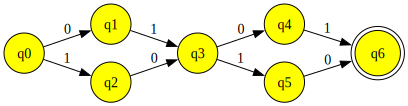

In [6]:
# Restricted states
St = St0.copy()
St.intersect(hfst.regex('((((St0 - (H1 & T1)) & (H1 | T1)) & (St0 - (H2 & T2))) & (H2 | T2))',definitions=defs))
St.view()

In [7]:
# Add St to the definitions
defs.update({"St":St})

In [8]:
# Constrain H1, T1, H2, T2 by St
H1.intersect(St)
T1.intersect(St)
H2.intersect(St)
T2.intersect(St)
H1.minimize()
T1.minimize()
H2.minimize()
T2.minimize()
# Add the new state constants to defs
defs.update({"H1":H1,"T1":T1,"H2":H2,"T2":T2})

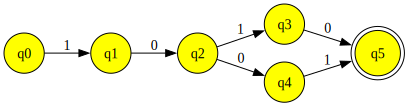

In [9]:
# Coin 1 is heads
H1.view()

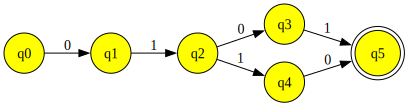

In [10]:
# Coin 1 is tails
T1.view()

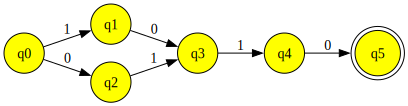

In [11]:
H2.view()

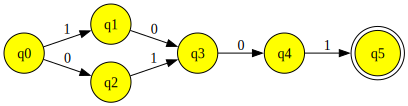

In [12]:
T2.view()

## Operations

In [13]:
# State complement
# X is a compiled machine that is assumed to be a set of states.
def Nst(X):
    nst = St.copy()
    nst.minus(X)
    return(nst)

In [14]:
# State complements of H1, T1, H2, T2
nH1 = Nst(H1)
nT1 = Nst(T1)
nH2 = Nst(H2)
nT2 = Nst(T2)
defs.update({"nH1":nH1,"nT1":nT1,"nH2":nH2,"nT2":nT2})

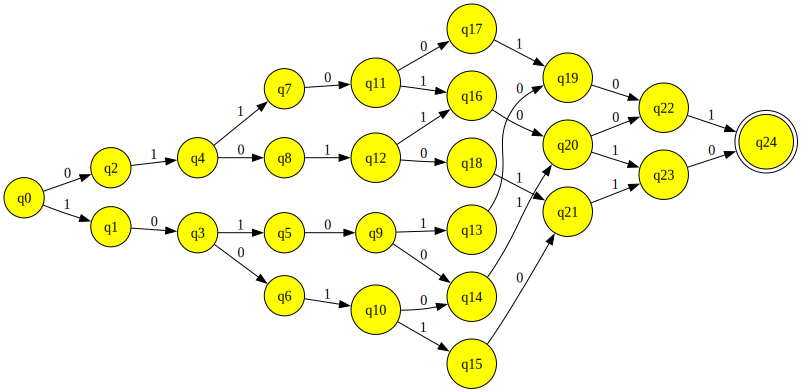

In [15]:
# Sequence of two unequal states. Two states are unequal iff they differ
# in at least one slot.
UnequalStPair = hfst.regex("[H1 nH1] | [nH1 H1] | [T1 nT1] | [nT1 T1] | [H2 nH2] | [nH2 H2] | [T2 nT2] | [nT2 T2]",definitions=defs)
UnequalStPair.minimize()
UnequalStPair.view()

### Decorated events
A decorated event is an event flanked by compatible states.

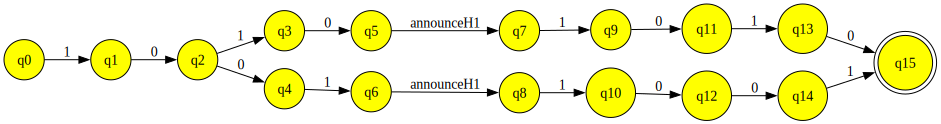

In [16]:
announceH1 = hfst.regex('[[[H1 announceH1] H1] & [[[H2 announceH1] H2] | [[T2 announceH1] T2]]]',definitions=defs)
announceH1.minimize()
announceH1.view()

In [17]:
announceH1 = hfst.regex('[[[H1 announceH1] H1] & [[[H2 announceH1] H2] | [[T2 announceH1] T2]]]',definitions=defs)
announceT1 = hfst.regex('[[[T1 announceT1] T1] & [[[H2 announceT1] H2] | [[T2 announceT1] T2]]]',definitions=defs)

announceH2 = hfst.regex('[[[H2 announceH2] H2] & [[[H1 announceH2] H1] | [[T1 announceH2] T1]]]',definitions=defs)
announceT2 = hfst.regex('[[[T2 announceT2] T2] & [[[H1 announceT2] H1] | [[T1 announceT2] T1]]]',definitions=defs)

peekamyH1 = hfst.regex('[[[H1 peekamyH1] H1] & [[[H2 peekamyH1] H2] | [[T2 peekamyH1] T2]]]',definitions=defs)
peekamyT1 = hfst.regex('[[[T1 peekamyT1] T1] & [[[H2 peekamyT1] H2] | [[T2 peekamyT1] T2]]]',definitions=defs)
peekamyH2 = hfst.regex('[[[H2 peekamyH2] H2] & [[[H1 peekamyH2] H1] | [[T1 peekamyH2] T1]]]',definitions=defs)
peekamyT2 = hfst.regex('[[[T2 peekamyT2] T2] & [[[H1 peekamyT2] H1] | [[T1 peekamyT2] T1]]]',definitions=defs)

peekbobH1 = hfst.regex('[[[H1 peekbobH1] H1] & [[[H2 peekbobH1] H2] | [[T2 peekbobH1] T2]]]',definitions=defs)
peekbobT1 = hfst.regex('[[[T1 peekbobT1] T1] & [[[H2 peekbobT1] H2] | [[T2 peekbobT1] T2]]]',definitions=defs)
peekbobH2 = hfst.regex('[[[H2 peekbobH2] H2] & [[[H1 peekbobH2] H1] | [[T1 peekbobH2] T1]]]',definitions=defs)
peekbobT2 = hfst.regex('[[[T2 peekbobT2] T2] & [[[H1 peekbobT2] H1] | [[T1 peekbobT2] T1]]]',definitions=defs)


announceH1.determinize()
announceT1.determinize()
announceH2.determinize()
announceT2.determinize()

peekamyH1.determinize()
peekamyT1.determinize()
peekamyH2.determinize()
peekamyT2.determinize()

peekbobH1.determinize()
peekbobT1.determinize()
peekbobH2.determinize()
peekbobT2.determinize()

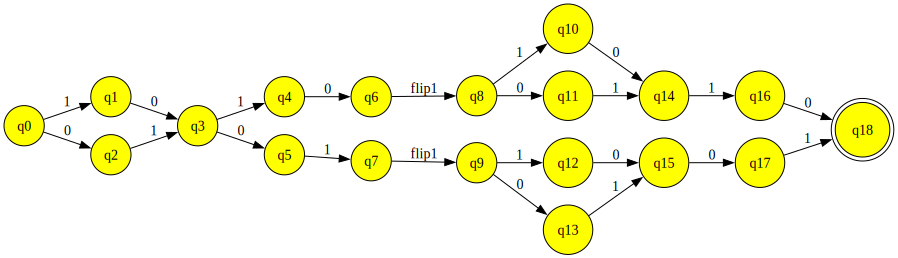

In [20]:
flip1 = hfst.regex('[[[St flip1] St] & [[[H2 flip1] H2] | [[T2 flip1] T2]]]', definitions=defs)
flip2 = hfst.regex('[[[St flip2] St] & [[[H1 flip2] H1] | [[T1 flip2] T1]]]',definitions=defs)
flip1.determinize()
flip1.view()


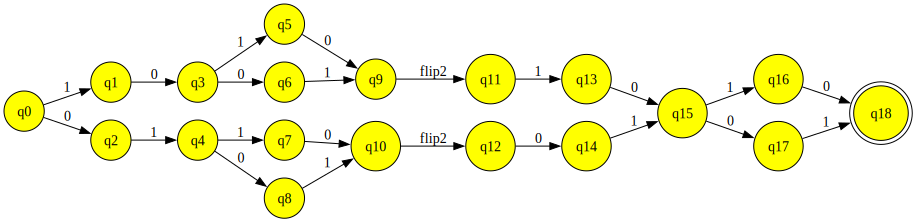

In [21]:
flip2.determinize()
flip2.view()

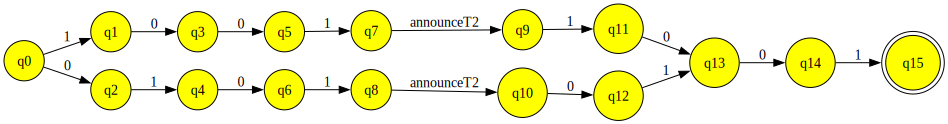

In [22]:
announceT2.view()

In [23]:
# These name decorated events
eventdefs = {"announceH1":announceH1,
    "announceT1":announceT1,
    "announceH2":announceH2,
    "announceT2":announceT2,
    "peekamyH1":peekamyH1,
    "peekamyT1":peekamyT1,
    "peekamyH2":peekamyH2,
    "peekamyT2":peekamyT2,
    "peekbobH1":peekbobH1,
    "peekbobT1":peekbobT1,
    "peekbobH2":peekbobH2,
    "peekbobT2":peekbobT2,
    "flip1":flip1,
    "flip2":flip2}

In [24]:
defs.update(eventdefs)
defs

{'Bool': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361150> >,
 'St0': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361600> >,
 'H1': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361cf0> >,
 'T1': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361d80> >,
 'H2': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa0183610c0> >,
 'T2': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361ea0> >,
 'St': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361c30> >,
 'nH1': <libhfst_

In [25]:
# The set of all decorated events
Event = hfst.regex('[announceH1 | announceT1 | announceH2 | announceT2 | peekamyH1 | peekamyT1 | peekamyH2 | peekamyT2 | peekbobH1 | peekbobT1 | peekbobH2 | peekbobT2 | flip1 | flip2]',
                       definitions=defs)

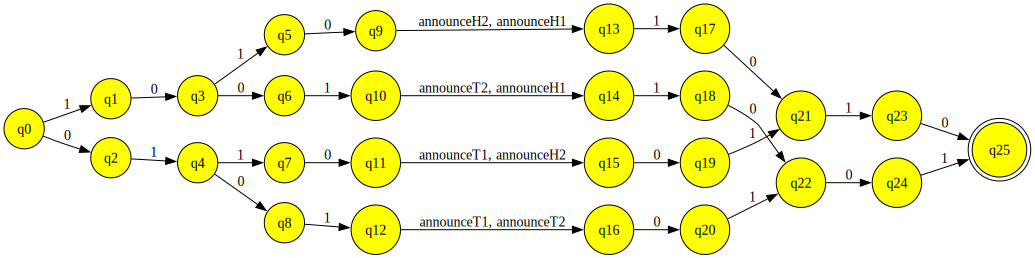

In [26]:
# The set of announcement events
EventAnnounce = hfst.regex('[announceH1 | announceT1 | announceH2 | announceT2 ]',
                       definitions=defs)
EventAnnounce.determinize()
EventAnnounce.view()

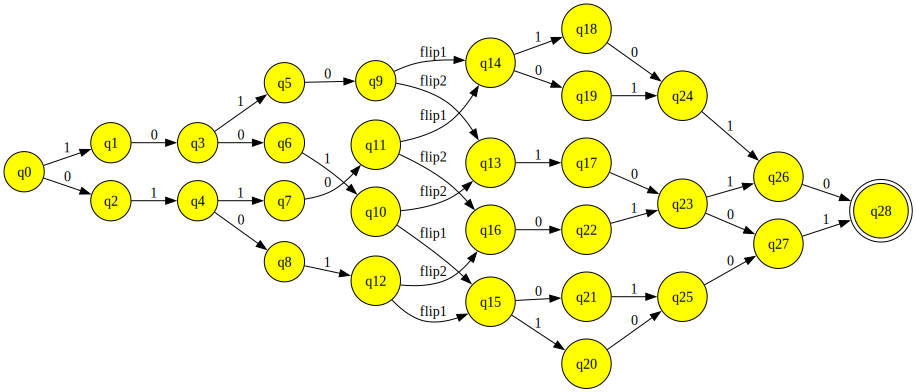

In [27]:
# The set of flip events
EventFlip = hfst.regex('[flip1 | flip2 ]',
                       definitions=defs)
EventFlip.determinize()
EventFlip.view()

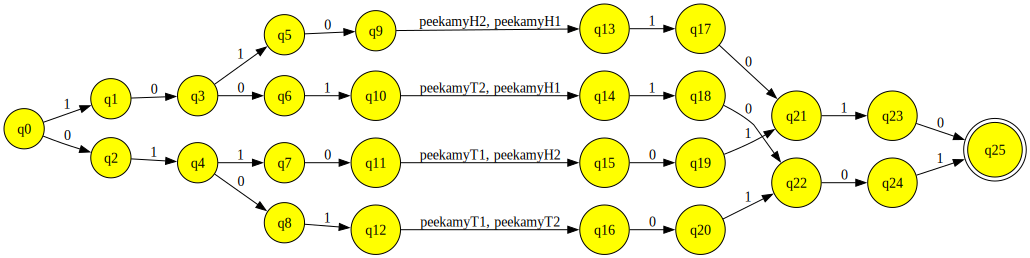

In [24]:
# Peeking events with agent Amy
EventAmy = hfst.regex('[peekamyH1 | peekamyT1 | peekamyH2 | peekamyT2 ]', definitions=defs)
EventAmy.determinize()
EventAmy.view()

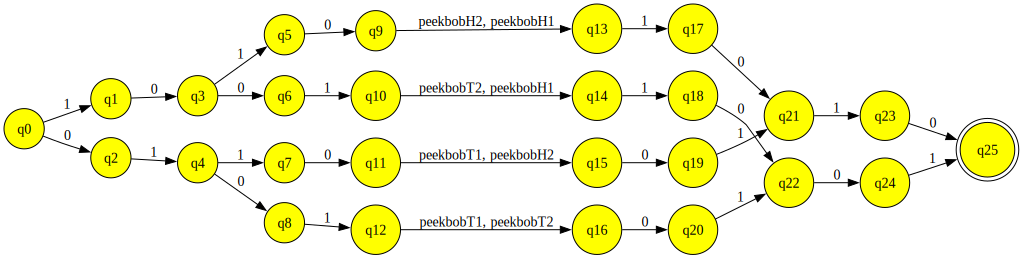

In [25]:
# Peeking events with agent Bob
EventBob = hfst.regex('[peekbobH1 | peekbobT1 | peekbobH2 | peekbobT2 ]', definitions=defs)
EventBob.determinize()
EventBob.view()

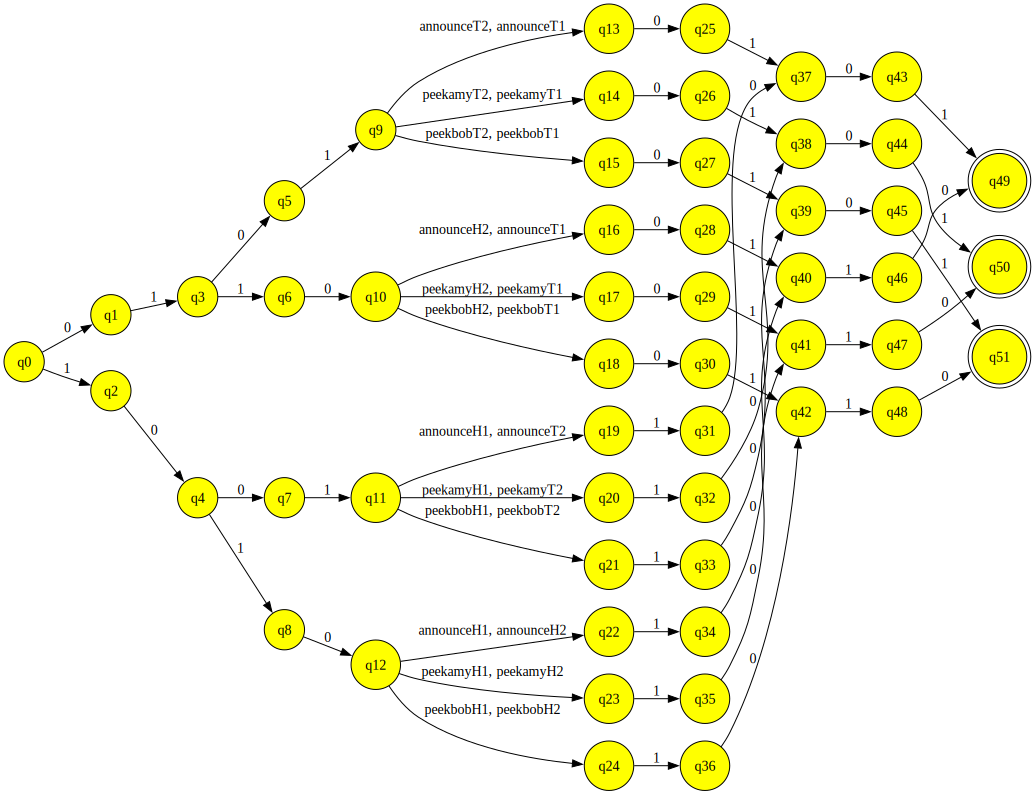

In [26]:
# Redefine Event from three parts
Event = EventAnnounce.copy()
Event.disjunct(EventAmy)
Event.disjunct(EventBob)
Event.determinize()
Event.view()

## Short names for worlds
A short form a world is obtained by deleting medial booleans. This is used for display, it is not used in the analysis.

In [28]:
Event0 = Event.copy()
delete_state = hfst.regex('St -> 0', definitions=defs)
Event0.compose(delete_state)
Event0.output_project()
Event0.determinize()
for x in Event0.extract_paths().keys(): print(x)

announceH1
announceH2
announceT1
announceT2
flip1
flip2
peekamyH1
peekamyH2
peekamyT1
peekamyT2
peekbobH1
peekbobH2
peekbobT1
peekbobT2


In [29]:
defs.update({"Event":Event,"UnequalStPair":UnequalStPair,"Event0":Event0})

In [30]:
# Rewrite relation that deletes a medial Boolean
Short0 = hfst.regex('p -> 0 || Event0 _ Event0', definitions=defs)
def short(x):
    y = x.copy()
    y.compose(Short0)
    y.output_project()
    return y
    

## Ekat

In [31]:
defs.update({"St":St})
defs

{'Bool': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361150> >,
 'St0': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361600> >,
 'H1': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361cf0> >,
 'T1': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361d80> >,
 'H2': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa0183610c0> >,
 'T2': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361ea0> >,
 'St': <libhfst_dev.HfstTransducer; proxy of <Swig Object of type 'std::vector< hfst::HfstTransducer >::value_type *' at 0x7fa018361c30> >,
 'nH1': <libhfst_

In [32]:
# Delete the second state in a block of two states.  This is used defining Ekat concatenation.
Squash = hfst.regex('St -> 0 || St _', definitions = defs)
# Strings that do not contain an unequal state pair
Wf0 = hfst.regex('~[$ UnequalStPair]', definitions = defs)
defs.update({"Squash":Squash,"Wf0":Wf0})

### Ekat product
Concatenate in the string algebra, remove elements that have an unequal state pair, than squash to get into
the Ekat subset.

In [33]:
# define Cn(X,Y) [[[X Y] & Wf0] .o. Squash].l;
def Cn(X,Y):
    Z = X.copy()
    Z.concatenate(Y)
    Z.intersect(Wf0)
    Z.compose(Squash)
    Z.output_project()
    #Z.determinize()
    Z.minimize()
    return Z

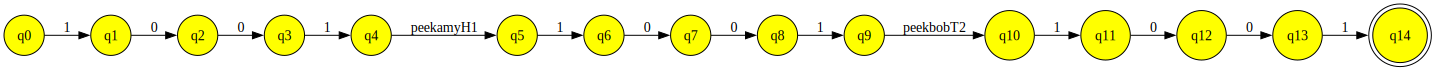

In [34]:
Cn(peekamyH1,peekbobT2).view()

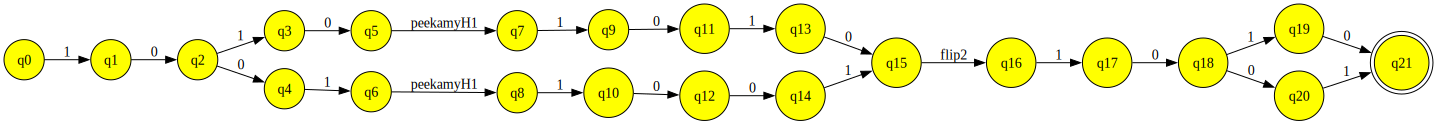

In [35]:
Cn(peekamyH1,flip2).view()

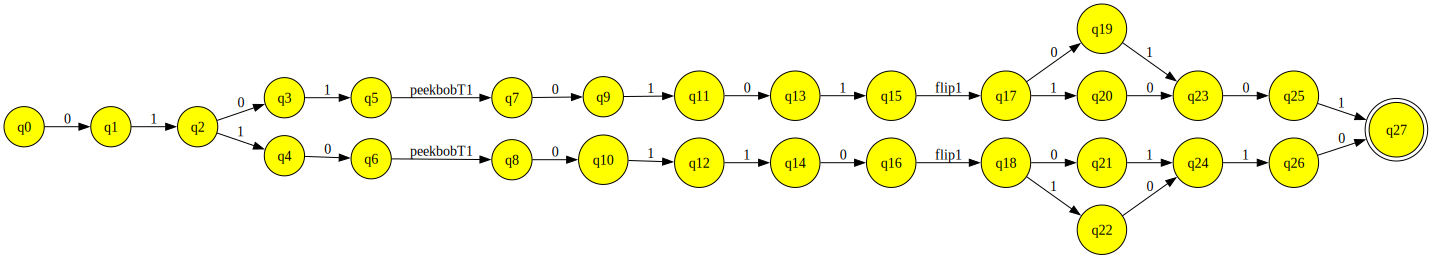

In [36]:
Cn(peekbobT1,flip1).view()

### Ekat Kleene operations

In [34]:
# define Kpl(X) [[[X+] & Wf0] .o. Squash].l;
def Kpl(X):
    Z = X.copy()
    Z.repeat_plus()
    Z.intersect(Wf0)
    Z.compose(Squash)
    Z.output_project()
    Z.determinize()
    Z.minimize()
    return Z

In [35]:
# Kleene Star
# The identity is St, not the empty string.
# define Kst(X) St |  Kpl(X);
def Kst(X):
    Z = Kpl(X)
    Z.disjunct(St)
    Z.determinize()
    Z.minimize()
    return(Z)
  

In [36]:
# Inverse of Squash
Squashi = Squash.copy()
Squashi.invert()

In [37]:
# Concatenation of relations
# define Cnr(R,S) Squash.i .o. Wf0 .o. [R S] .o. Wf0 .o. Squash;
def Cnr(R,S):
    Z = R.copy()
    Z.concatenate(S)
    Z.compose(Wf0)
    Z.compose(Squash)
    Z.invert()
    Z.compose(Wf0)
    Z.compose(Squash)
    Z.invert()
    Z.determinize()
    return(Z)
    

In [38]:
# Kleene plus on relations
# define RelKpl(X) Squash.i .o. Wf0 .o. [X+] .o. Wf0 .o. Squash;
def RelKpl(R):
    Z = R.copy()
    Z.repeat_plus() 
    Z.compose(Wf0)
    Z.compose(Squash)
    Z.invert()
    Z.compose(Wf0)
    Z.compose(Squash)
    Z.invert()
    Z.determinize()
    return(Z)

In [39]:
# Kleene star on relations
# This is used in defining world alternative relations.
# The total relation on St is included.
# define RelKst(X) [St .x. St] | RelKpl(X);
def RelKst(R):
    Z = RelKpl(R)
    StxSt = St.copy()
    StxSt.cross_product(St)
    Z.disjunct(StxSt)
    return(Z)

## Examples of product of tests
Product of tests is conjunction

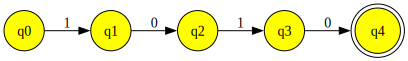

In [40]:
Cn(H1,H2).view()

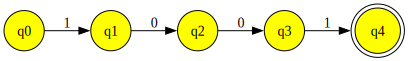

In [41]:
Cn(H1,T2).view()

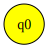

In [42]:
Cn(T1,H1).view()

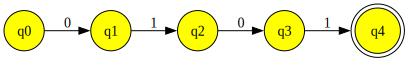

In [43]:
Cn(T1,T2).view()

## Examples of product of events

In [44]:
EventName = ['announceH1',
 'announceT1',
 'announceH2',
 'announceT2',
 'peekamyH1',
 'peekamyT1',
 'peekamyH2',
 'peekamyT2',
 'peekbobH1',
 'peekbobT1',
 'peekbobH2',
 'peekbobT2']

announceT1 announceT2 =


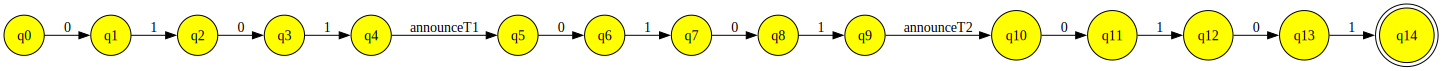

In [45]:
n1 = 'announceT1'
n2 = 'announceT2'
e1 = hfst.regex(n1,definitions=defs)
e2 = hfst.regex(n2,definitions=defs)
e3 = Cn(e1,e2)
e3.minimize()
print(f'{n1} {n2} =')
e3.view()

announceH1 announceH1 =


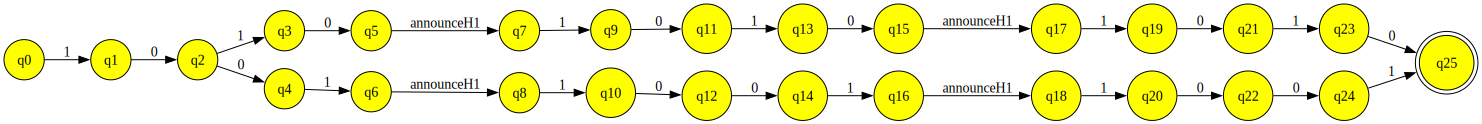

announceH1 announceT1 =


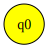

announceH1 announceH2 =


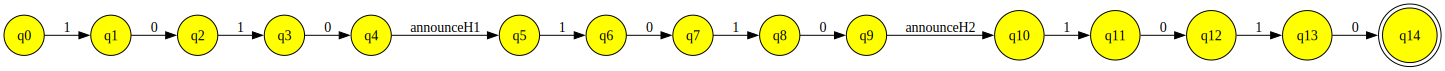

announceH1 announceT2 =


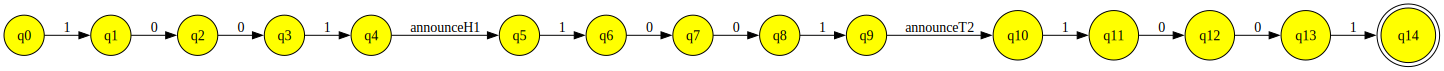

announceH1 peekamyH1 =


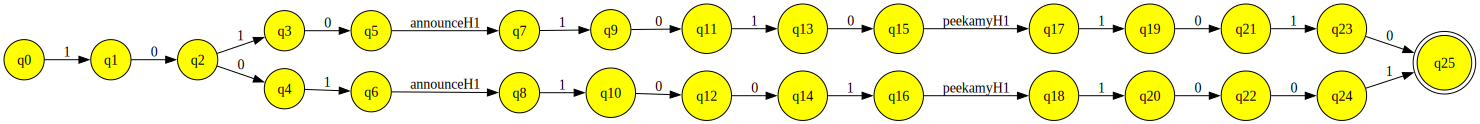

announceH1 peekamyT1 =


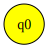

announceH1 peekamyH2 =


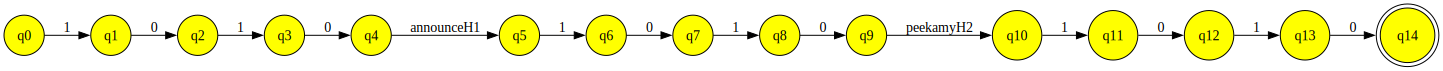

announceH1 peekamyT2 =


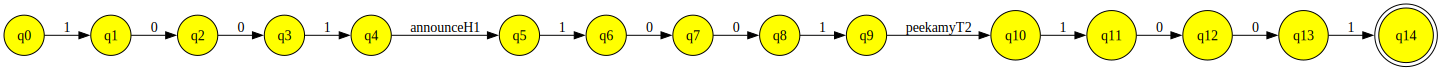

announceH1 peekbobH1 =


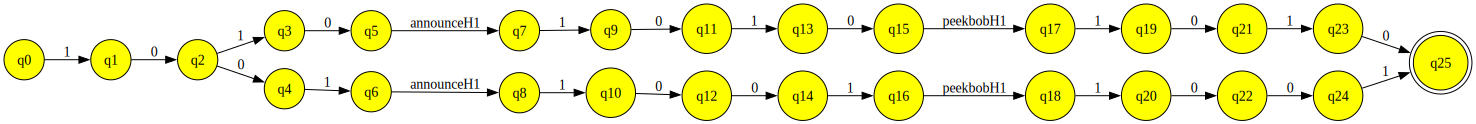

announceH1 peekbobT1 =


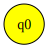

announceH1 peekbobH2 =


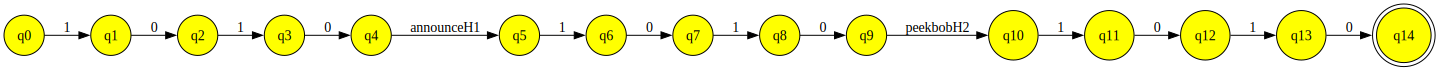

announceH1 peekbobT2 =


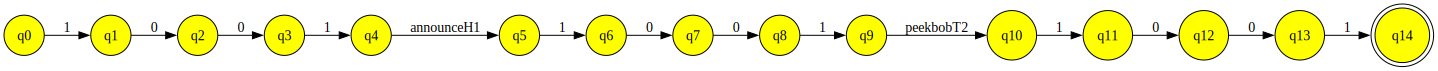

announceT1 announceH1 =


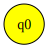

announceT1 announceT1 =


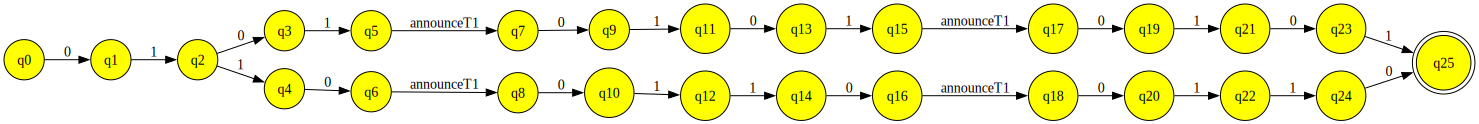

announceT1 announceH2 =


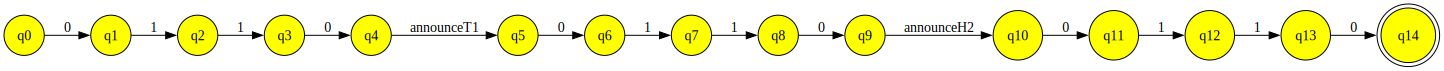

announceT1 announceT2 =


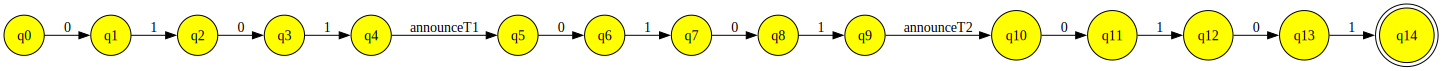

announceT1 peekamyH1 =


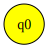

announceT1 peekamyT1 =


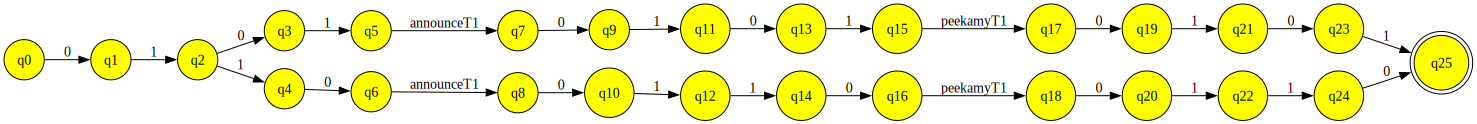

announceT1 peekamyH2 =


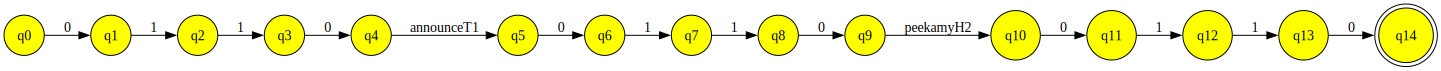

announceT1 peekamyT2 =


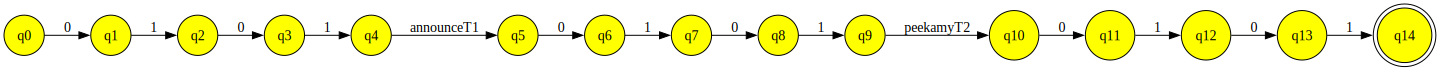

announceT1 peekbobH1 =


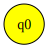

announceT1 peekbobT1 =


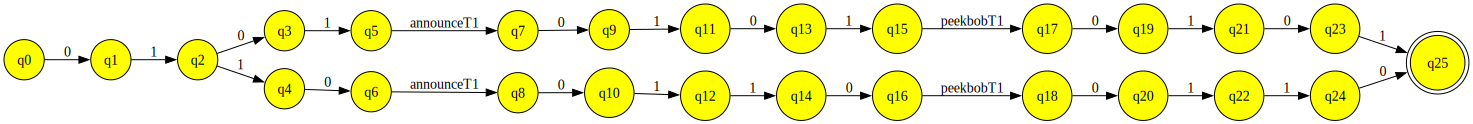

announceT1 peekbobH2 =


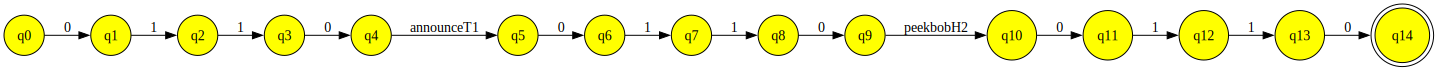

announceT1 peekbobT2 =


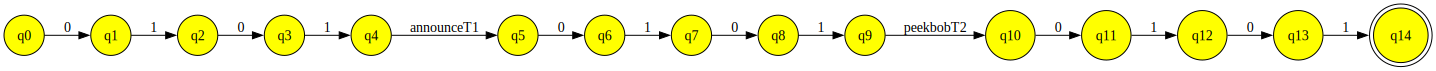

announceH2 announceH1 =


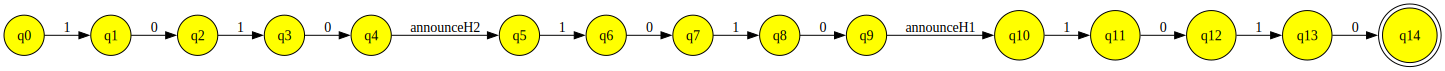

announceH2 announceT1 =


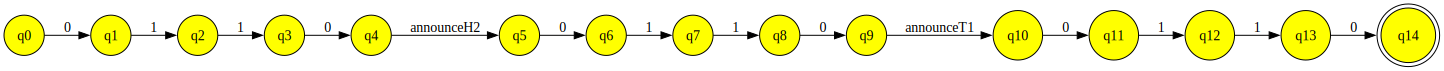

announceH2 announceH2 =


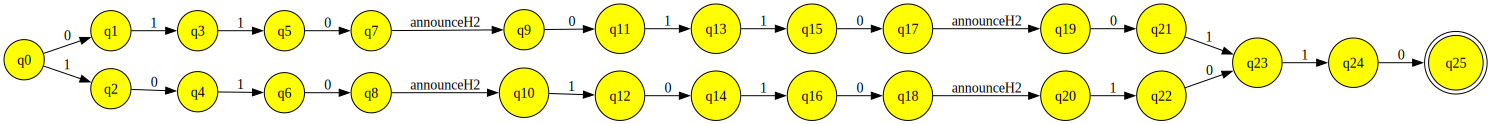

announceH2 announceT2 =


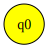

announceH2 peekamyH1 =


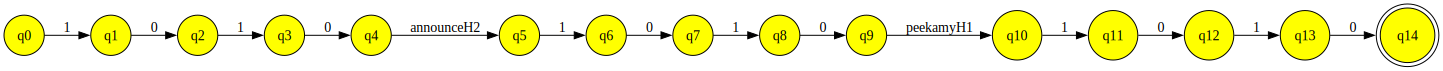

announceH2 peekamyT1 =


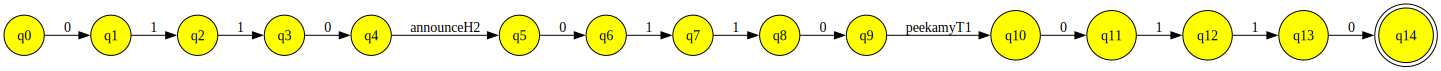

announceH2 peekamyH2 =


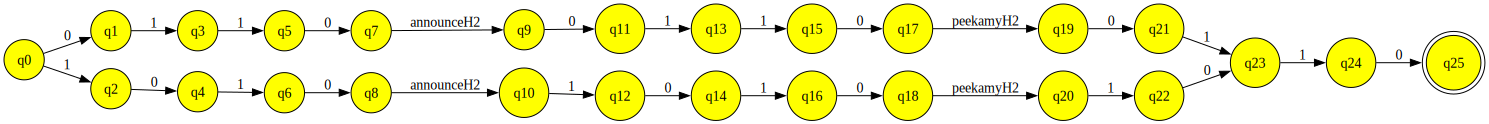

announceH2 peekamyT2 =


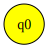

announceH2 peekbobH1 =


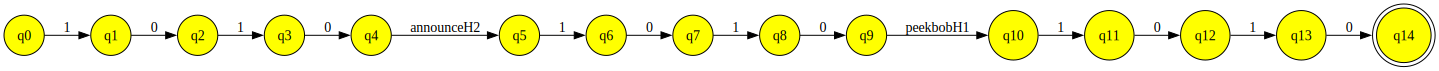

announceH2 peekbobT1 =


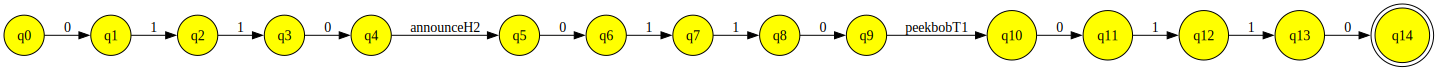

announceH2 peekbobH2 =


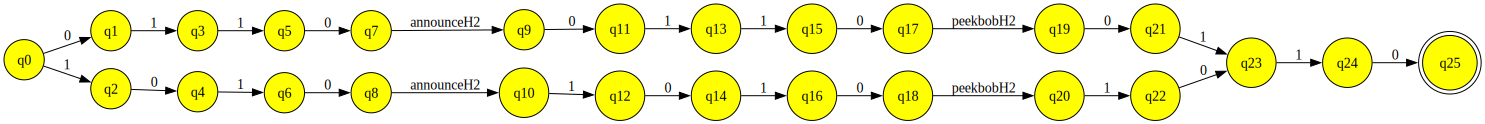

announceH2 peekbobT2 =


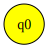

announceT2 announceH1 =


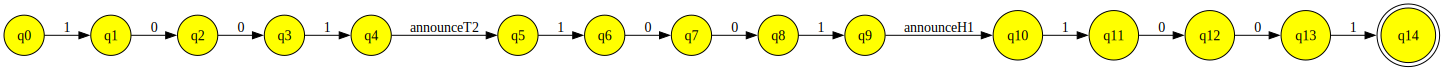

announceT2 announceT1 =


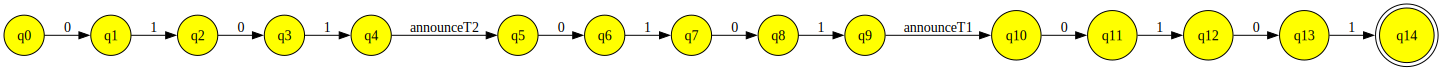

announceT2 announceH2 =


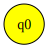

announceT2 announceT2 =


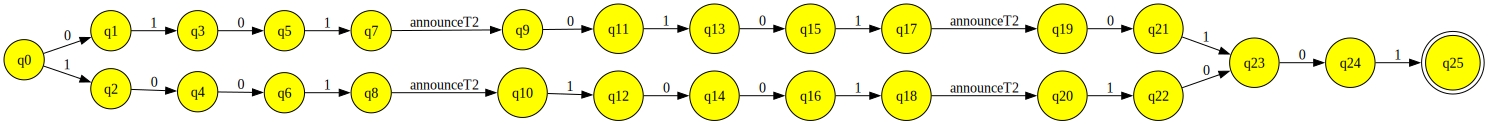

announceT2 peekamyH1 =


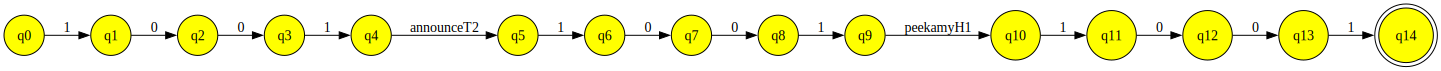

announceT2 peekamyT1 =


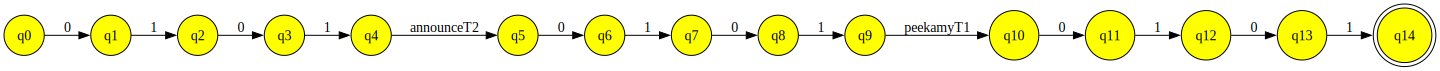

announceT2 peekamyH2 =


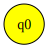

announceT2 peekamyT2 =


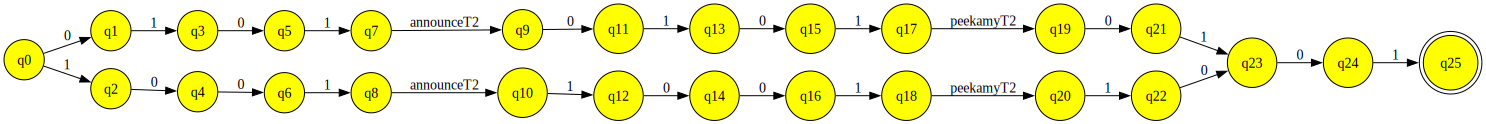

announceT2 peekbobH1 =


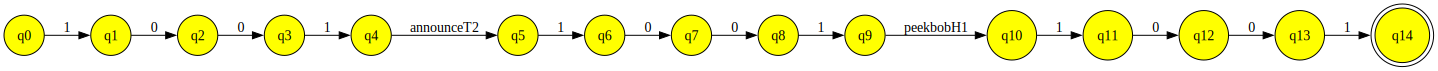

announceT2 peekbobT1 =


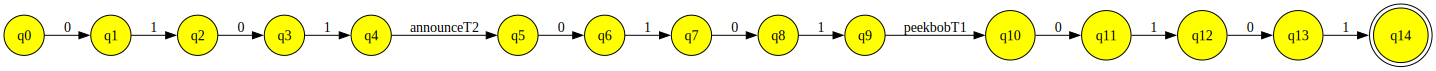

announceT2 peekbobH2 =


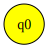

announceT2 peekbobT2 =


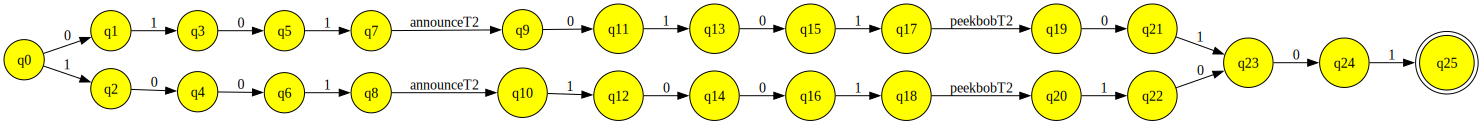

peekamyH1 announceH1 =


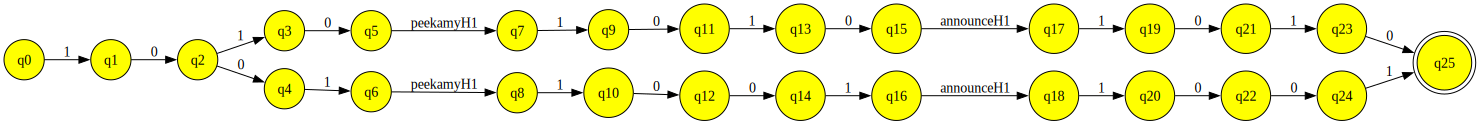

peekamyH1 announceT1 =


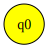

peekamyH1 announceH2 =


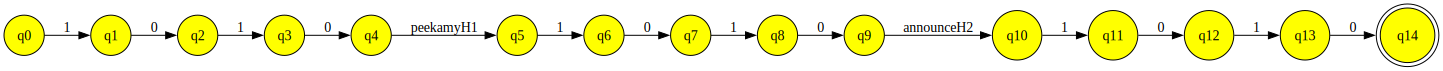

peekamyH1 announceT2 =


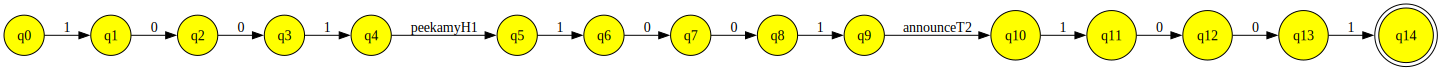

peekamyH1 peekamyH1 =


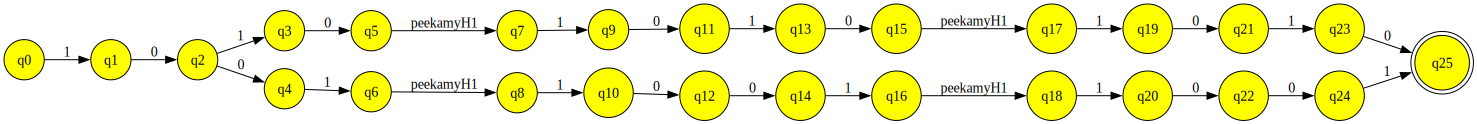

peekamyH1 peekamyT1 =


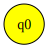

peekamyH1 peekamyH2 =


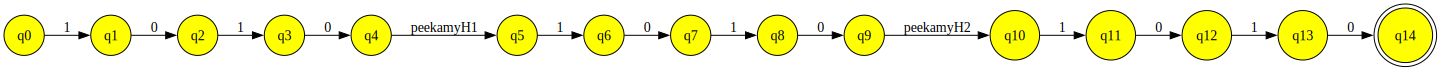

peekamyH1 peekamyT2 =


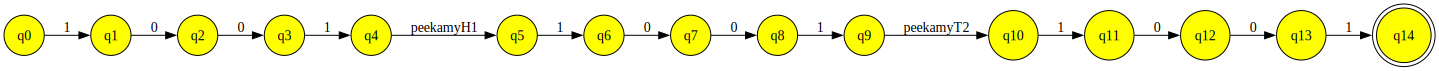

peekamyH1 peekbobH1 =


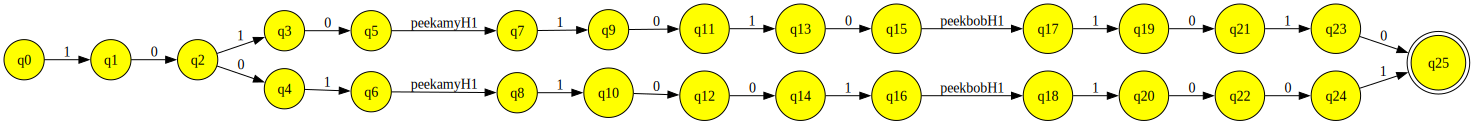

peekamyH1 peekbobT1 =


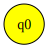

peekamyH1 peekbobH2 =


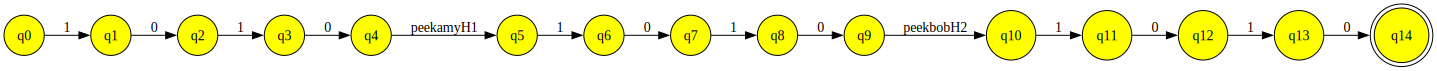

peekamyH1 peekbobT2 =


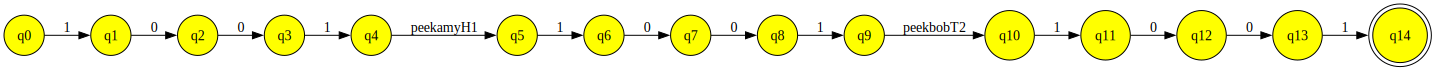

peekamyT1 announceH1 =


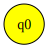

peekamyT1 announceT1 =


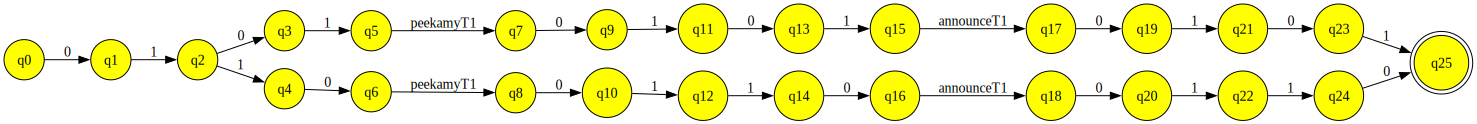

peekamyT1 announceH2 =


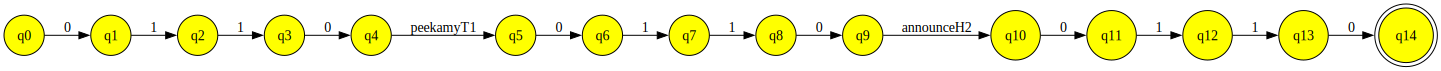

peekamyT1 announceT2 =


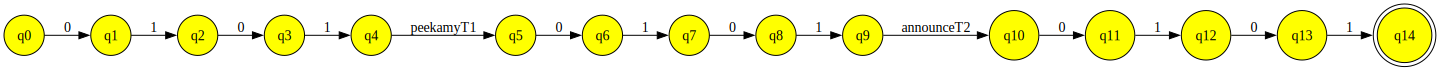

peekamyT1 peekamyH1 =


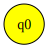

peekamyT1 peekamyT1 =


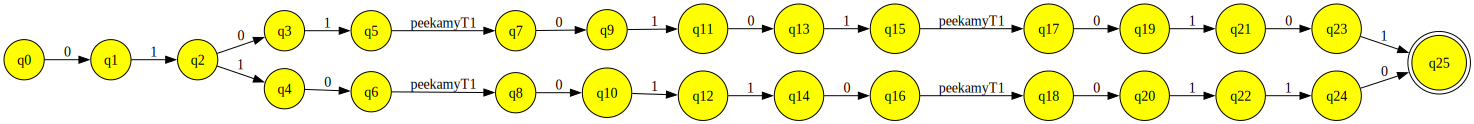

peekamyT1 peekamyH2 =


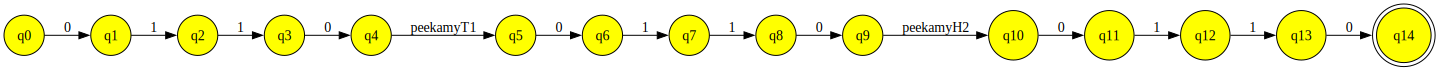

peekamyT1 peekamyT2 =


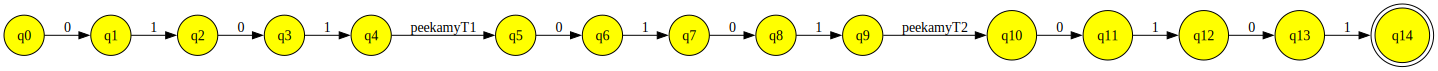

peekamyT1 peekbobH1 =


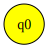

peekamyT1 peekbobT1 =


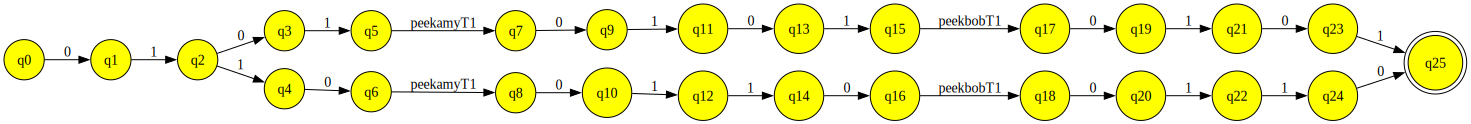

peekamyT1 peekbobH2 =


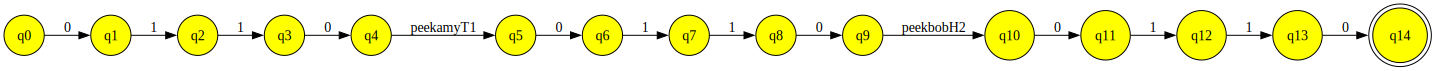

peekamyT1 peekbobT2 =


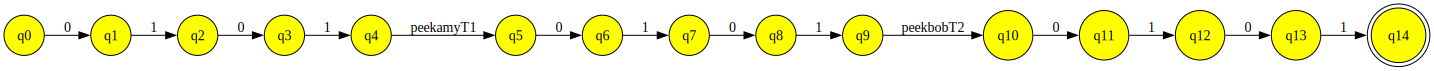

peekamyH2 announceH1 =


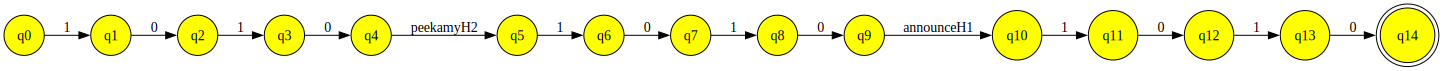

peekamyH2 announceT1 =


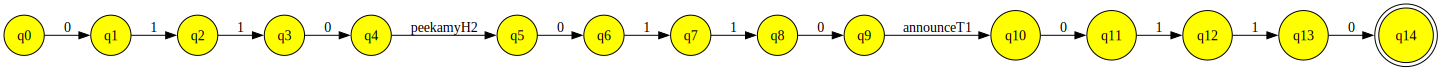

peekamyH2 announceH2 =


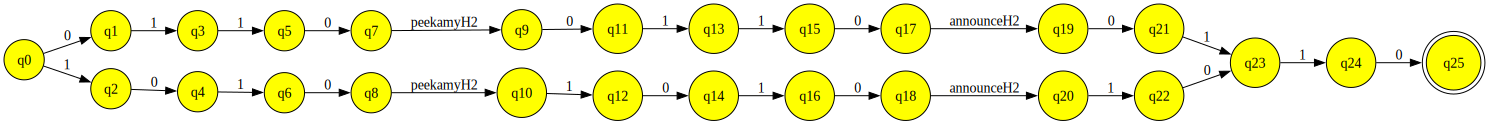

peekamyH2 announceT2 =


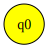

peekamyH2 peekamyH1 =


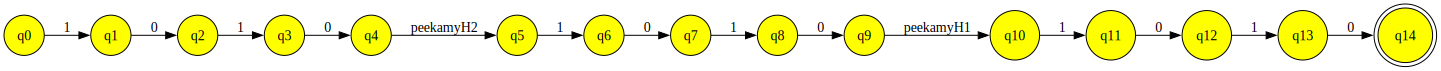

peekamyH2 peekamyT1 =


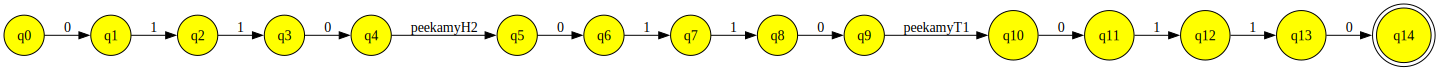

peekamyH2 peekamyH2 =


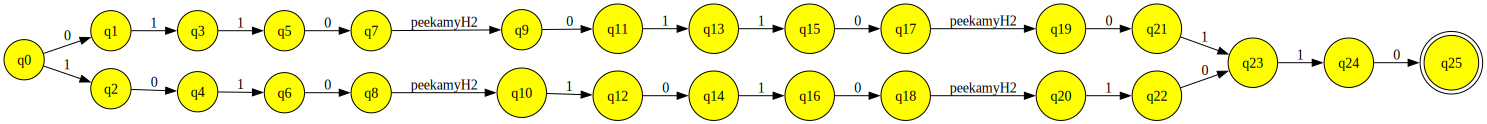

peekamyH2 peekamyT2 =


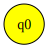

peekamyH2 peekbobH1 =


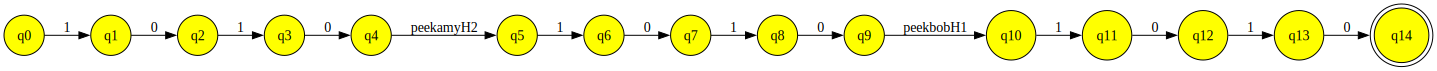

peekamyH2 peekbobT1 =


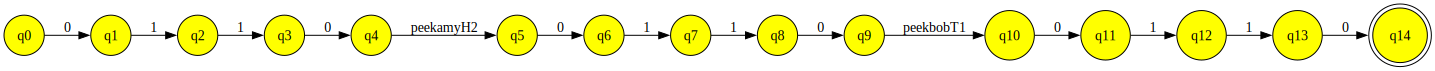

peekamyH2 peekbobH2 =


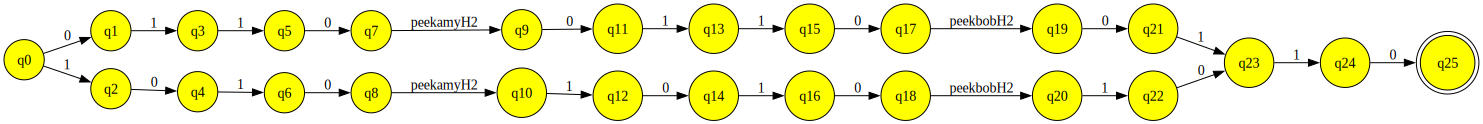

peekamyH2 peekbobT2 =


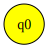

peekamyT2 announceH1 =


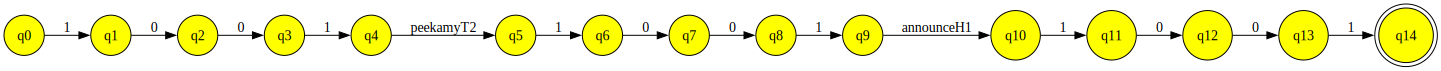

peekamyT2 announceT1 =


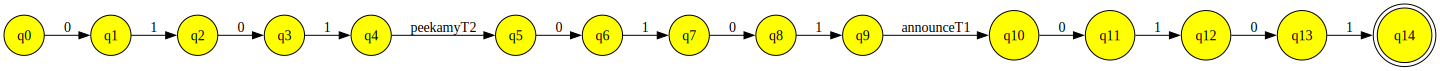

peekamyT2 announceH2 =


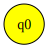

peekamyT2 announceT2 =


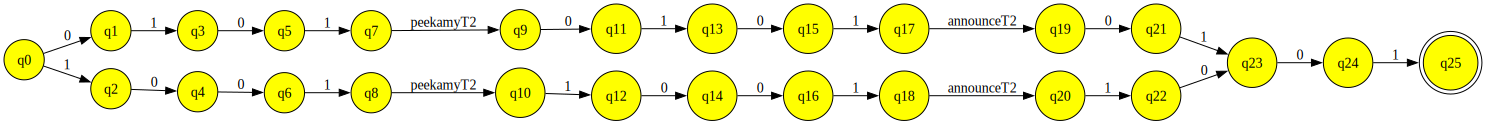

peekamyT2 peekamyH1 =


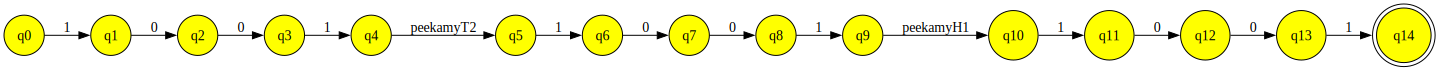

peekamyT2 peekamyT1 =


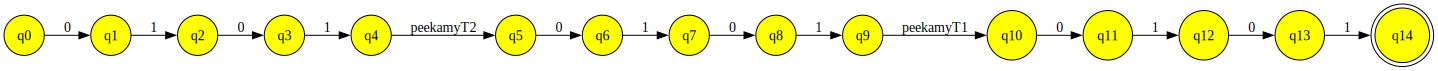

peekamyT2 peekamyH2 =


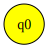

peekamyT2 peekamyT2 =


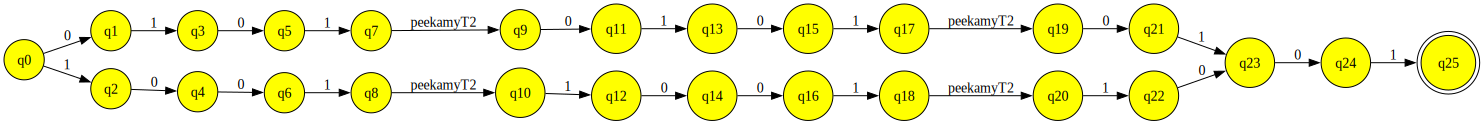

peekamyT2 peekbobH1 =


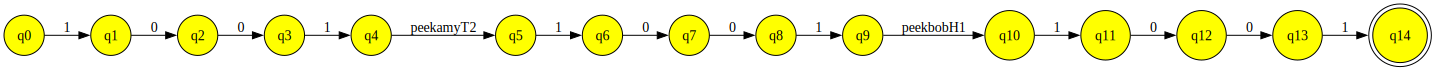

peekamyT2 peekbobT1 =


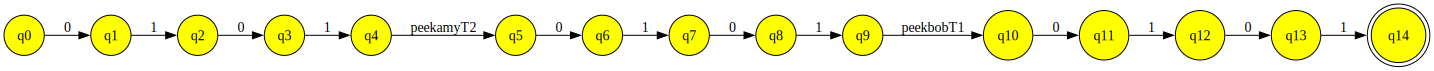

peekamyT2 peekbobH2 =


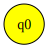

peekamyT2 peekbobT2 =


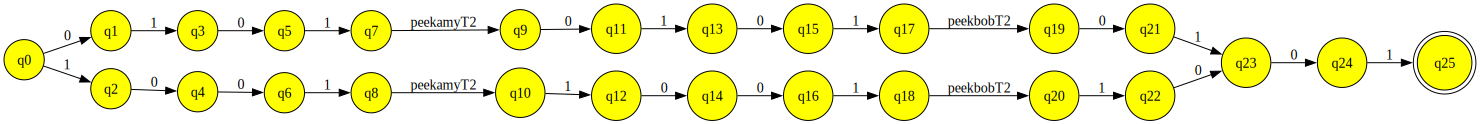

peekbobH1 announceH1 =


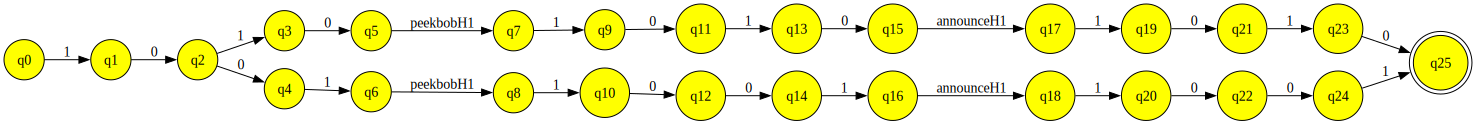

peekbobH1 announceT1 =


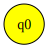

peekbobH1 announceH2 =


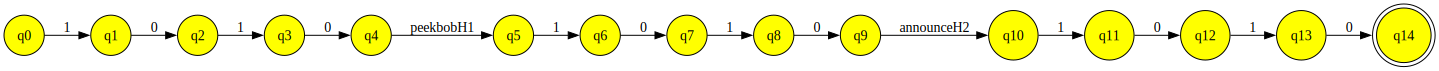

peekbobH1 announceT2 =


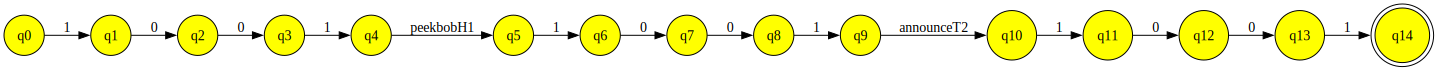

peekbobH1 peekamyH1 =


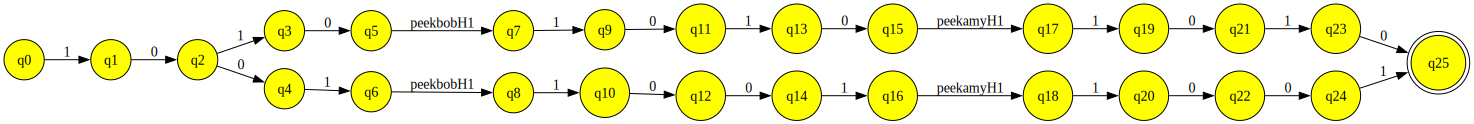

peekbobH1 peekamyT1 =


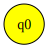

peekbobH1 peekamyH2 =


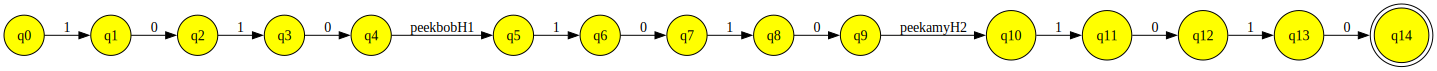

peekbobH1 peekamyT2 =


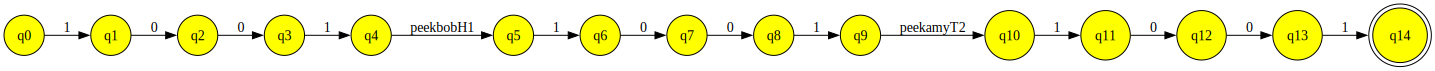

peekbobH1 peekbobH1 =


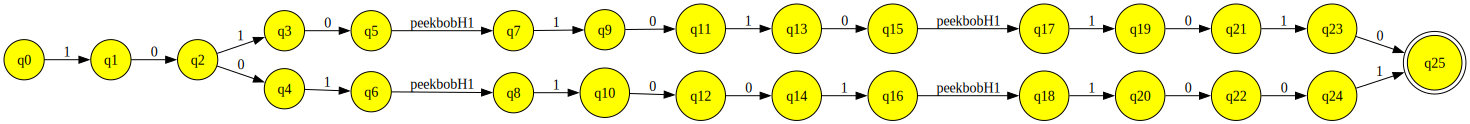

peekbobH1 peekbobT1 =


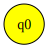

peekbobH1 peekbobH2 =


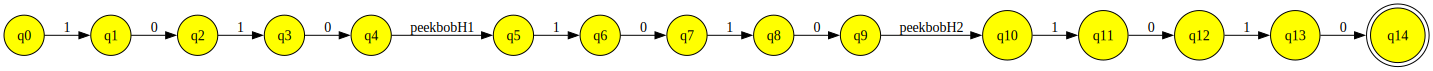

peekbobH1 peekbobT2 =


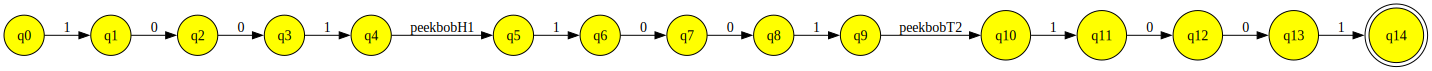

peekbobT1 announceH1 =


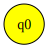

peekbobT1 announceT1 =


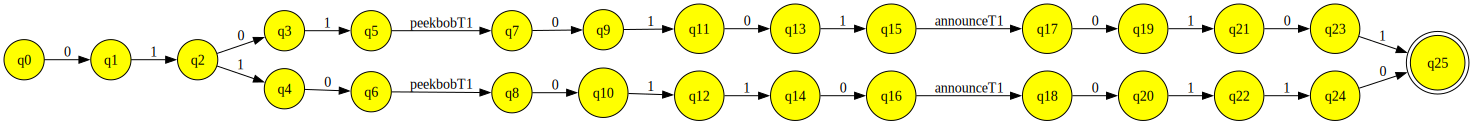

peekbobT1 announceH2 =


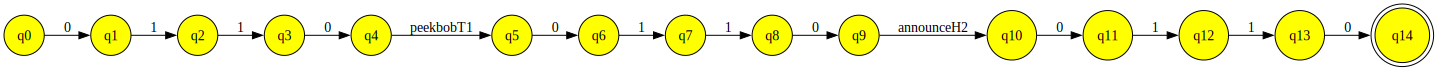

peekbobT1 announceT2 =


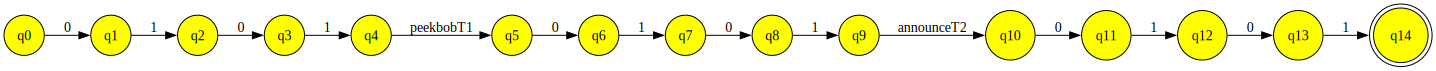

peekbobT1 peekamyH1 =


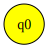

peekbobT1 peekamyT1 =


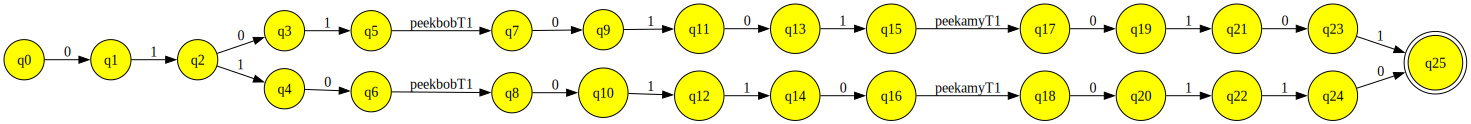

peekbobT1 peekamyH2 =


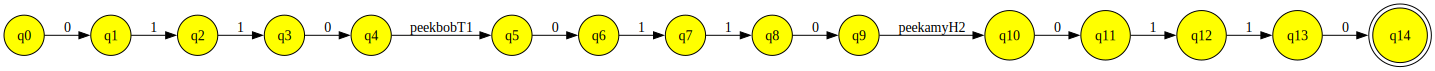

peekbobT1 peekamyT2 =


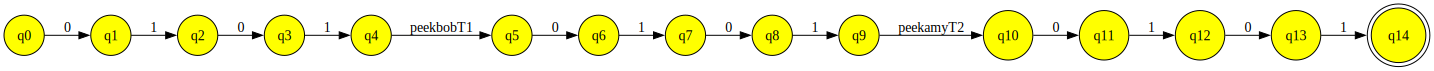

peekbobT1 peekbobH1 =


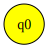

peekbobT1 peekbobT1 =


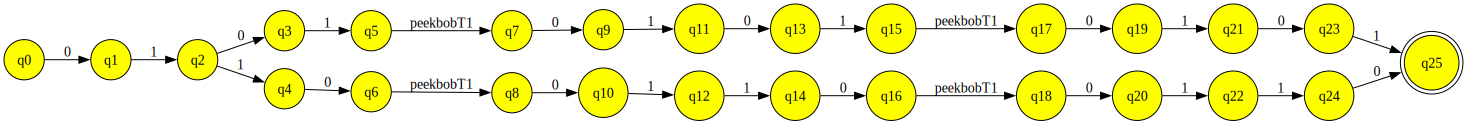

peekbobT1 peekbobH2 =


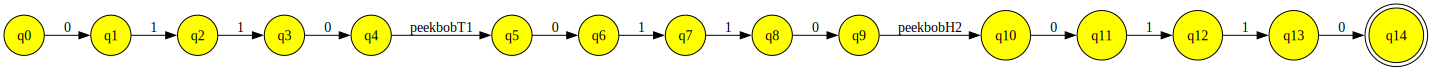

peekbobT1 peekbobT2 =


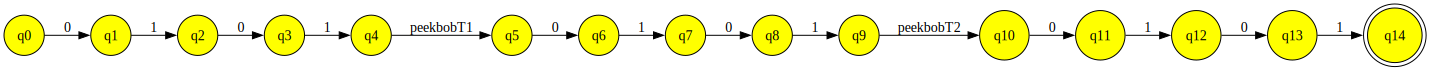

peekbobH2 announceH1 =


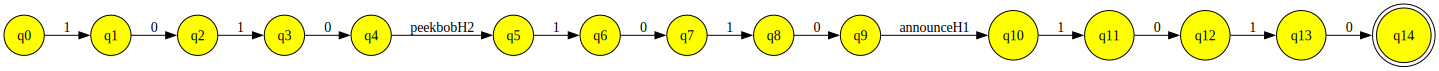

peekbobH2 announceT1 =


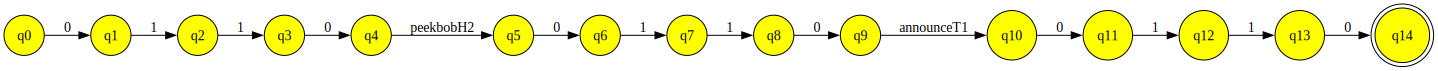

peekbobH2 announceH2 =


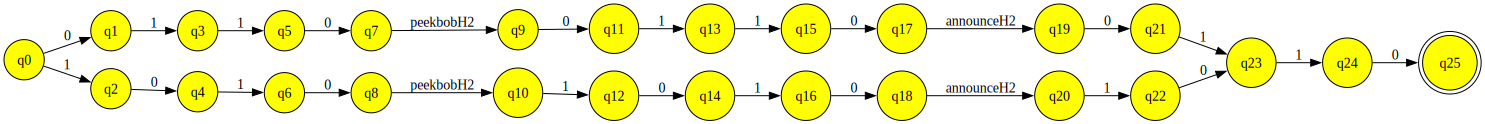

peekbobH2 announceT2 =


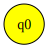

peekbobH2 peekamyH1 =


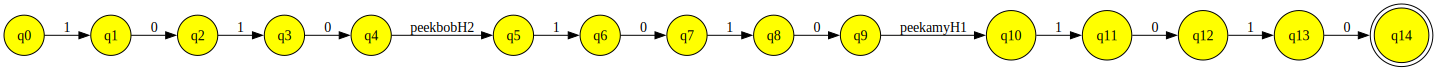

peekbobH2 peekamyT1 =


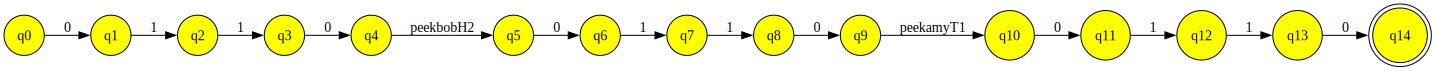

peekbobH2 peekamyH2 =


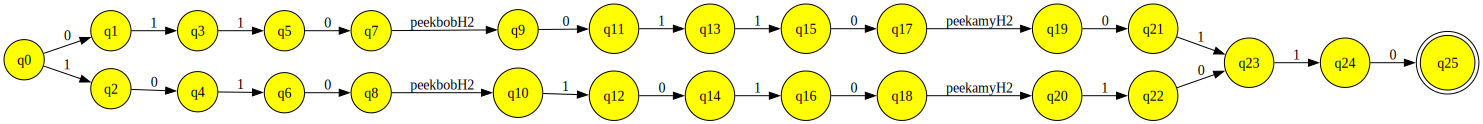

peekbobH2 peekamyT2 =


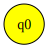

peekbobH2 peekbobH1 =


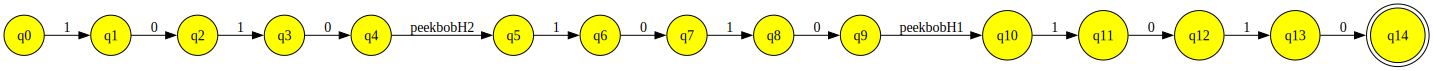

peekbobH2 peekbobT1 =


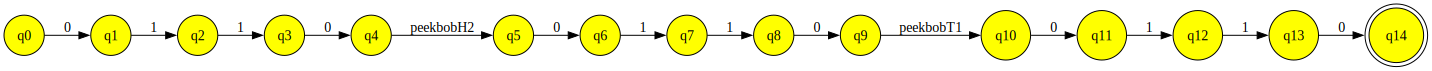

peekbobH2 peekbobH2 =


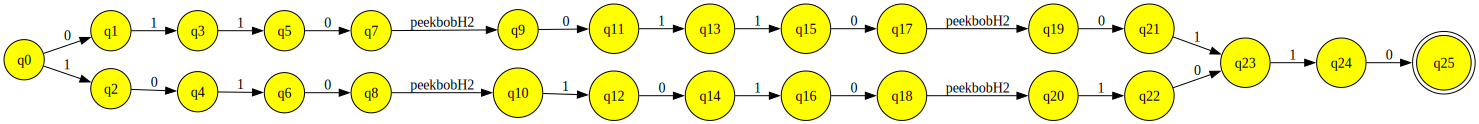

peekbobH2 peekbobT2 =


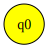

peekbobT2 announceH1 =


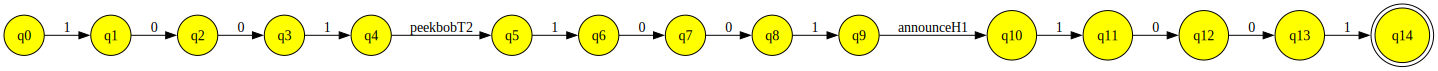

peekbobT2 announceT1 =


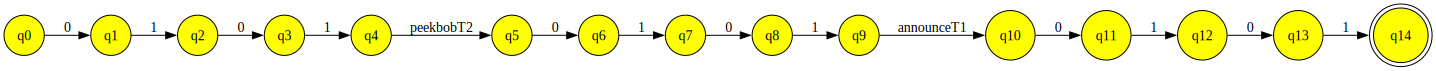

peekbobT2 announceH2 =


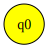

peekbobT2 announceT2 =


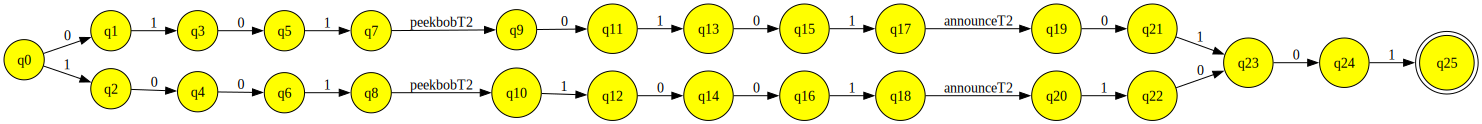

peekbobT2 peekamyH1 =


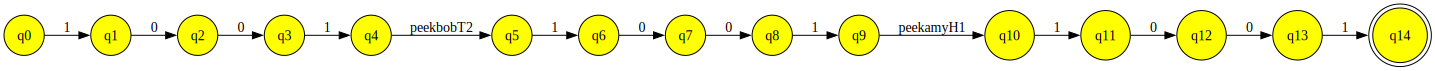

peekbobT2 peekamyT1 =


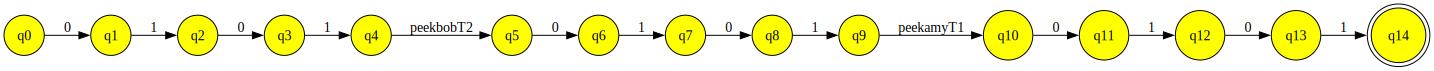

peekbobT2 peekamyH2 =


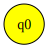

peekbobT2 peekamyT2 =


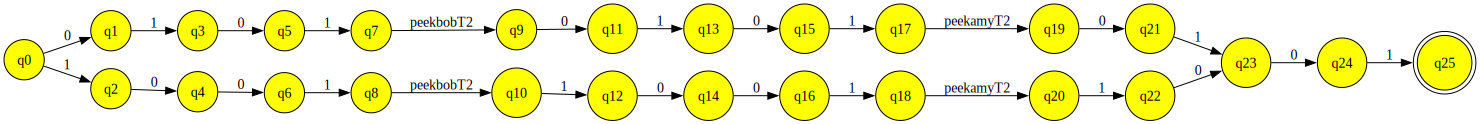

peekbobT2 peekbobH1 =


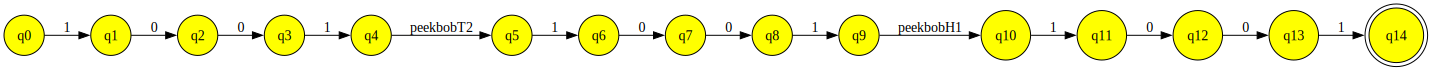

peekbobT2 peekbobT1 =


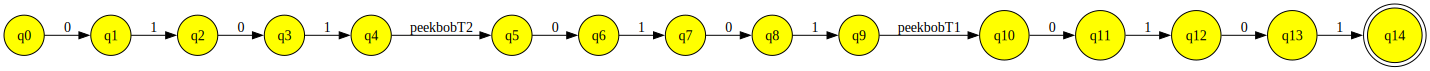

peekbobT2 peekbobH2 =


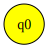

peekbobT2 peekbobT2 =


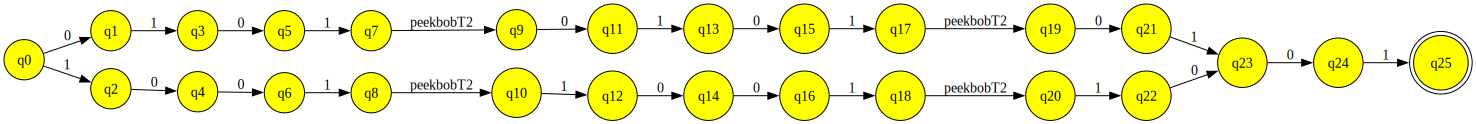

In [46]:
for n1 in EventName:
    for n2 in EventName:
        e1 = hfst.regex(n1,definitions=defs)
        e2 = hfst.regex(n2,definitions=defs)
        e3 = Cn(e1,e2)
        e3.minimize()
        print(f'{n1} {n2} =')
        display(e3.view())

## Worlds

In [97]:
# A world is a concatenation of events
W = Kst(Event)
defs.update({"W":W})

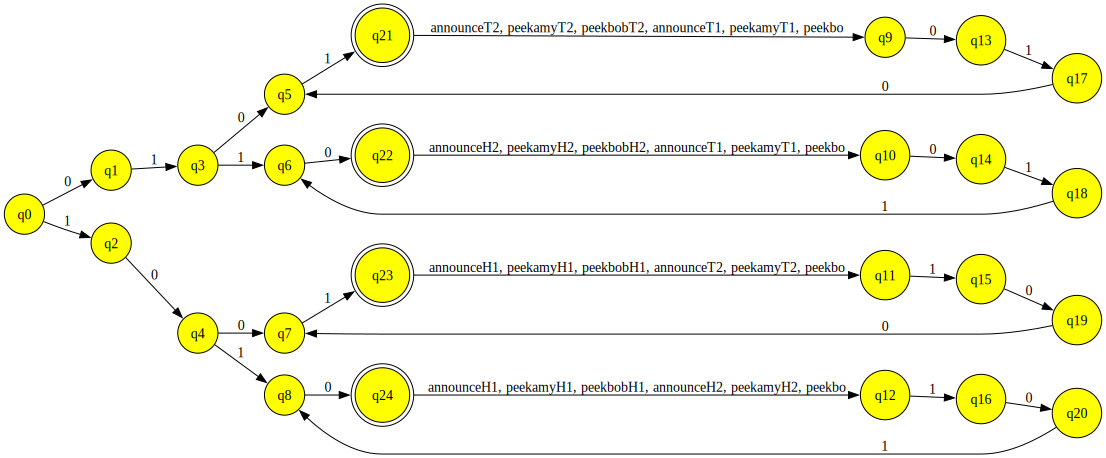

In [53]:
# This is simple, because states don't change. Not all of the event names are visible in the graph.
W.view()

## Alternative relations

In [68]:
# Unconstrained cross product of the decorated events
eventCrossEvent = Event.copy()
eventCrossEvent.cross_product(Event)
eventCrossEvent.view()
defs.update({"eventCrossEvent":eventCrossEvent})
# Shorter name
defs.update({"eCe":eventCrossEvent})  


In [81]:
# Construct Amy's event alternatives by composition
amyAnnounceRel = hfst.regex('[announceH1 .o. eCe .o. announceH1] |' +
                           '[announceT1 .o. eCe .o. announceT1] |' + 
                           '[announceH2 .o. eCe .o. announceH2] |' + 
                           '[announceT2 .o. eCe .o. announceT2]', definitions=defs)

In [83]:
# When Amy peeks, she knows what she is peeking at
amyPeekamyRel = hfst.regex('[peekamyH1 .o. eCe .o. peekamyH1] |' +
                           '[peekamyT1 .o. eCe .o. peekamyT1] |' +
                           '[peekamyH2 .o. eCe .o. peekamyH2] |' +
                           '[peekamyT2 .o. eCe .o. peekamyT2]',definitions=defs)

In [86]:
# When Bob peeks, for Amy he could be peeking at heads or tails
amyPeekbobRel = hfst.regex('[peekbobH1 .o. eCe .o. peekbobH1] |' +
                           '[peekbobT1 .o. eCe .o. peekbobT1] |' +
                           '[peekbobH2 .o. eCe .o. peekbobH2] |' +
                           '[peekbobT2 .o. eCe .o. peekbobT2] |' +
                           '[peekbobH1 .o. eCe .o. peekbobT1] |' +
                           '[peekbobT1 .o. eCe .o. peekbobH1] |' +
                           '[peekbobH2 .o. eCe .o. peekbobT2] |' +
                           '[peekbobT2 .o. eCe .o. peekbobH2]',definitions=defs)

In [99]:
amyEventAlt = amyAnnounceRel.copy()
amyEventAlt.disjunct(amyPeekamyRel)
amyEventAlt.disjunct(amyPeekbobRel)
amyEventAlt.minimize()

In [91]:
bobAnnounceRel = amyAnnounceRel.copy()

In [92]:
bobPeekbobRel = hfst.regex('[peekbobH1 .o. eCe .o. peekbobH1] |' +
                           '[peekbobT1 .o. eCe .o. peekbobT1] |' +
                           '[peekbobH2 .o. eCe .o. peekbobH2] |' +
                           '[peekbobT2 .o. eCe .o. peekbobT2]',definitions=defs)

In [93]:
bobPeekamyRel = hfst.regex('[peekamyH1 .o. eCe .o. peekamyH1] |' +
                           '[peekamyT1 .o. eCe .o. peekamyT1] |' +
                           '[peekamyH2 .o. eCe .o. peekamyH2] |' +
                           '[peekamyT2 .o. eCe .o. peekamyT2] |' +
                           '[peekamyH1 .o. eCe .o. peekamyT1] |' +
                           '[peekamyT1 .o. eCe .o. peekamyH1] |' +
                           '[peekamyH2 .o. eCe .o. peekamyT2] |' +
                           '[peekamyT2 .o. eCe .o. peekamyH2]',definitions=defs)

In [101]:
bobEventAlt = bobAnnounceRel.copy()
bobEventAlt.disjunct(bobPeekbobRel)
bobEventAlt.disjunct(bobPeekamyRel)
bobEventAlt.minimize()

In [102]:
defs.update({"amyEventAlt":amyEventAlt,"bobEventAlt":bobEventAlt})

In [129]:
# World alternative relation for Amy via Kleene star in the KAT algebra
amy = RelKst(amyEventAlt)
amy.minimize()

# World alternative relation for Bob  
bob = RelKst(bobEventAlt)
bob.minimize()

defs.update({"amy":amy,"bob":bob})

In [130]:
# Alternatives for Amy to Bob peeking at T2
X = Cn(H1,peekbobT2)
print(list(X.extract_paths().keys()))
X.compose(amy)
X.output_project()
print(list(X.extract_paths().keys()))

['1001peekbobT21001']
['0101peekbobT20101', '0110peekbobH20110', '1001peekbobT21001', '1010peekbobH21010']


In [154]:
# Alternatives for Amy to Amy peeking at T2
X = Cn(H1,peekamyT2)
print(list(X.extract_paths().keys()))
X.compose(amy)
X.output_project()
print(list(X.extract_paths().keys()))

['1001peekamyT21001']
['0101peekamyT20101', '1001peekamyT21001']


In [155]:
# Diamond modality
# R is a Kripke relation on W
# X is a proposition
# define Dia(R,X) [R .o. X].u;
def Dia(R,X):
    Z = R.copy()
    Z.compose(X)
    Z.input_project()
    Z.minimize()
    return(Z)

In [156]:
# Complement
# X assumed to be a set
# define Not(X) W - X;
def Not(X):
    Z = W.copy()
    Z.minus(X)
    Z.minimize(()
    return(Z)

In [157]:
# Box modality
# It's the dual of diamond.
# define Box(R,X) Not(Dia(R,Not(X)));
def Box(R,X):
    Z = Not(Dia(R,Not(X)))
    Z.minimize()
    return(Z)

In [158]:
# Conjunction
def And(X,Y):
    Z = X.copy()
    Z.intersect(Y)
    Z.minimize()
    return(Z)

In [159]:
# Short worlds
One = Event;
Two = Cn(One,Event)
Three = Cn(Two,Event)

## Examples 

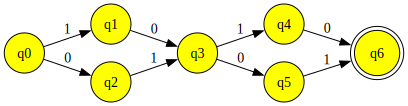

In [166]:
X = Dia(amy,St)
X.minimize()
X.view()

In [169]:
X = peekamyH1.copy()
X.compose(amy)
X.output_project()
print(list(X.extract_paths().keys()))

['1001peekamyH11001', '1010peekamyH11010']


In [173]:
def alt(R,X):
    Z = X.copy()
    Z.compose(R)
    Z.output_project()
    print(list(Z.extract_paths().keys()))
def show(X):
    print(list(X.extract_paths().keys()))

In [177]:
X = Cn(T2,peekamyH1)
show(X)
alt(amy,X)
alt(bob,X)

['1001peekamyH11001']
['1001peekamyH11001', '1010peekamyH11010']
['0101peekamyT10101', '0110peekamyT10110', '1001peekamyH11001', '1010peekamyH11010']


In [181]:
show(Box(amy,Cn(announceH1,announceT2)))

['1001announceH11001announceT21001']


In [203]:
H1T2 = Cn(H1,T2)
show(H1T2)
# Worlds of length two where Amy knows H1T2
show(Box(amy,Cn(Two,H1T2)))
show(Box(bob,And(Two,H1T2)))

['1001']
['1001announceH11001announceT21001', '1001announceH11001peekamyT21001', '1001announceT21001announceH11001', '1001announceT21001peekamyH11001', '1001peekamyH11001announceT21001', '1001peekamyH11001peekamyT21001', '1001peekamyT21001announceH11001', '1001peekamyT21001peekamyH11001']
[]


In [190]:
# Just announcements in one order or the other
show(Box(amy,Box(bob,Cn(Two,H1T2))))
show(Box(bob,Box(amy,Cn(Two,H1T2))))

['1001announceH11001announceT21001', '1001announceT21001announceH11001']
['1001announceH11001announceT21001', '1001announceT21001announceH11001']


In [192]:
show(Box(amy,And(Cn(Two,H1),Box(bob,Cn(Two,T2)))))

['1001announceH11001announceT21001', '1001announceT21001announceH11001', '1001announceT21001peekamyH11001', '1001peekamyH11001announceT21001']


In [208]:
def BoxSt(R,V,S):
    X = Cn(W,S)
    Z = And(V,Box(R,X))
    show(Z)

In [209]:
BoxSt(amy,Two,H1T2)

['1001announceH11001announceT21001', '1001announceH11001peekamyT21001', '1001announceT21001announceH11001', '1001announceT21001peekamyH11001', '1001peekamyH11001announceT21001', '1001peekamyH11001peekamyT21001', '1001peekamyT21001announceH11001', '1001peekamyT21001peekamyH11001']
